# Regression in DL with TensorFlow

In [1]:
# find tensorflow version
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.13.0


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [3]:
# data import kartay hyn
df = sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.shape

(53940, 10)

In [5]:
# preprocessing
X = df.drop('price', axis=1)
y = df['price']

# encode the categorical variables
le = LabelEncoder()
X['cut'] = le.fit_transform(X['cut'])
X['color'] = le.fit_transform(X['color'])
X['clarity'] = le.fit_transform(X['clarity'])

# train test split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# create neural network architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=X_train.shape[1:]), #input layer without any activation function
    tf.keras.layers.Dense(32, activation='relu'), #hidden layer with 32 neurons and relu activation function
    tf.keras.layers.Dense(16, activation='relu'), #hidden layer with 16 neurons and relu activation function
    tf.keras.layers.Dense(1) #output layer with 1 neuron
])

Metal device set to: Apple M1 Max

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB



In [7]:
# compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

Question: What is train, test and validation dataset?

In [11]:
# train the model

model.fit(X_train, y_train, epochs=4, verbose=1, validation_split=0.2, batch_size=32)

CPU times: user 1 µs, sys: 1e+03 ns, total: 2 µs
Wall time: 2.86 µs
Epoch 1/4
1079/1079 [==============================] - 9s 9ms/step - loss: 1737953.2500 - val_loss: 1441117.8750
Epoch 2/4
1079/1079 [==============================] - 9s 8ms/step - loss: 1699366.8750 - val_loss: 1415567.5000
Epoch 3/4
1079/1079 [==============================] - 9s 8ms/step - loss: 1665054.8750 - val_loss: 1398274.3750
Epoch 4/4
1079/1079 [==============================] - 9s 9ms/step - loss: 1638244.8750 - val_loss: 1383158.0000


In [9]:
# test loss of the model
loss = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')

338/338 [==============================] - 2s 5ms/step - loss: 1442313.1250
Test loss: 1442313.125


Question: How to find the best number of epochs?

Call back: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

In [12]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss', # this command is used to monitor the validation loss
    patience=2, # number of epochs to wait before stopping the training
    restore_best_weights=True # this command is used to restore the best weights of the model
    )

model.fit(
    X_train, y_train,
    epochs=5, # maximum number of epochs to train the model
    validation_split=0.2, # this command is used to split the data into train and validation set
    callbacks=[early_stopping], # this command is used to stop the training when the validation loss does not improve
)

Epoch 1/5
1079/1079 [==============================] - 9s 8ms/step - loss: 1613339.1250 - val_loss: 1368800.1250
Epoch 2/5
1079/1079 [==============================] - 9s 8ms/step - loss: 1595418.1250 - val_loss: 1359999.8750
Epoch 3/5
1079/1079 [==============================] - 9s 8ms/step - loss: 1578476.7500 - val_loss: 1353569.5000
Epoch 4/5
1079/1079 [==============================] - 9s 9ms/step - loss: 1561005.5000 - val_loss: 1345659.0000
Epoch 5/5
1079/1079 [==============================] - 9s 8ms/step - loss: 1549596.8750 - val_loss: 1343032.2500


In [13]:
print(f'Trained for {len(model.history.epoch)} epochs')

Trained for 5 epochs


In [14]:
history = model.fit(
        X_train, y_train,
        epochs=5, # maximum number of epochs to train the model
        validation_split=0.2, # this command is used to split the data into train and validation set
        callbacks=[early_stopping], # this command is used to stop the training when the validation loss does not improve
    )

Epoch 1/5
1079/1079 [==============================] - 9s 9ms/step - loss: 1536148.7500 - val_loss: 1336882.5000
Epoch 2/5
1079/1079 [==============================] - 9s 8ms/step - loss: 1524291.5000 - val_loss: 1330111.3750
Epoch 3/5
1079/1079 [==============================] - 9s 8ms/step - loss: 1513579.0000 - val_loss: 1334160.7500
Epoch 4/5
1079/1079 [==============================] - 9s 8ms/step - loss: 1504087.6250 - val_loss: 1321732.5000
Epoch 5/5
1079/1079 [==============================] - 9s 8ms/step - loss: 1492473.2500 - val_loss: 1317706.7500


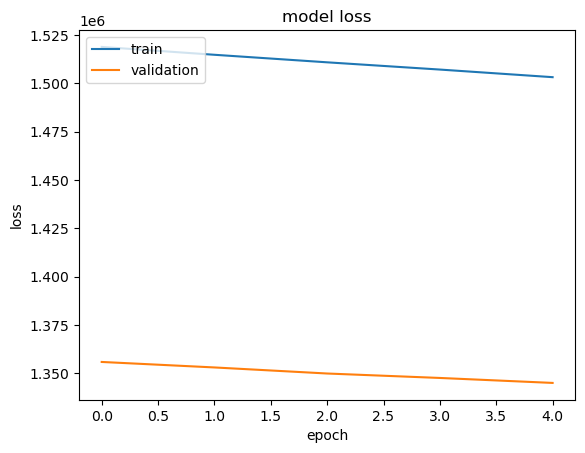

In [34]:
# plot the training and validation loss here
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


Epoch 1/5
1079/1079 [==============================] - 9s 8ms/step - loss: 20608140.0000 - val_loss: 4658107.0000
Epoch 2/5
1079/1079 [==============================] - 9s 8ms/step - loss: 3123518.5000 - val_loss: 2024167.8750
Epoch 3/5
1079/1079 [==============================] - 9s 8ms/step - loss: 2093014.3750 - val_loss: 1626169.7500
Epoch 4/5
1079/1079 [==============================] - 9s 8ms/step - loss: 1900311.5000 - val_loss: 1554919.1250
Epoch 5/5
1079/1079 [==============================] - 9s 8ms/step - loss: 1833465.6250 - val_loss: 1543196.8750


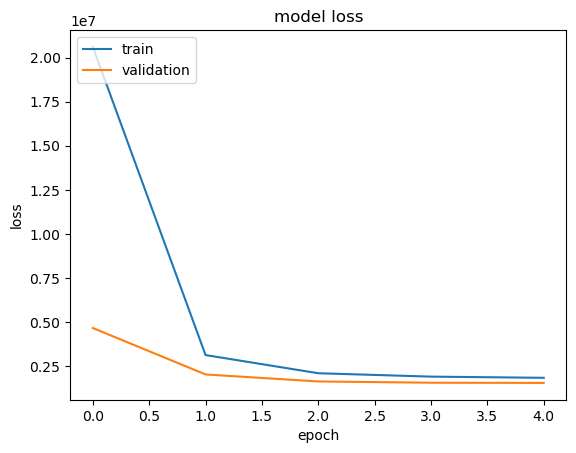

In [37]:
history = model.fit(
        X_train, y_train,
        epochs=5, # maximum number of epochs to train the model
        validation_split=0.2, # this command is used to split the data into train and validation set
        callbacks=[early_stopping], # this command is used to stop the training when the validation loss does not improve
    )
# plot the training and validation loss here
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


# Tips dataset

In [15]:
# Load the dataset
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Epoch 1/300
5/5 [==============================] - 1s 63ms/step - loss: 483.4751 - val_loss: 462.1829
Epoch 2/300
5/5 [==============================] - 0s 19ms/step - loss: 481.5411 - val_loss: 460.3877
Epoch 3/300
5/5 [==============================] - 0s 18ms/step - loss: 479.4642 - val_loss: 458.5126
Epoch 4/300
5/5 [==============================] - 0s 18ms/step - loss: 477.2575 - val_loss: 456.5007
Epoch 5/300
5/5 [==============================] - 0s 19ms/step - loss: 474.7566 - val_loss: 454.3408
Epoch 6/300
5/5 [==============================] - 0s 19ms/step - loss: 471.9958 - val_loss: 451.9789
Epoch 7/300
5/5 [==============================] - 0s 18ms/step - loss: 468.8906 - val_loss: 449.3530
Epoch 8/300
5/5 [==============================] - 0s 18ms/step - loss: 465.5251 - val_loss: 446.4102
Epoch 9/300
5/5 [==============================] - 0s 18ms/step - loss: 461.7411 - val_loss: 442.9164
Epoch 10/300
5/5 [==============================] - 0s 22ms/step - loss: 457.2097 

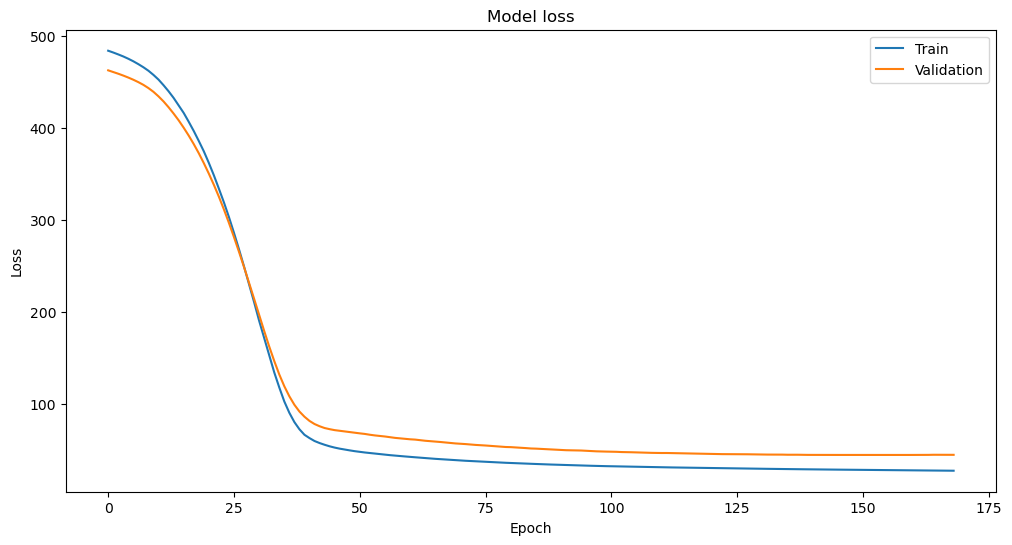

2/2 [==============================] - 0s 42ms/step - loss: 45.7014
Test loss: 45.70143508911133


In [17]:
import tensorflow as tf
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load the dataset
tips = sns.load_dataset('tips')

# label encoding
le = LabelEncoder()
tips['sex'] = le.fit_transform(tips['sex'])
tips['smoker'] = le.fit_transform(tips['smoker'])
tips['day'] = le.fit_transform(tips['day'])
tips['time'] = le.fit_transform(tips['time'])

# Separate features and target
X = tips.drop('total_bill', axis=1) # assuming we're predicting the total_bill
y = tips['total_bill']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=[X_train.shape[1]]),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Define the early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  
    patience=25,  
    restore_best_weights=True  
)

# Train the model
history = model.fit(
    X_train, 
    y_train, 
    epochs=300,  
    batch_size=32, 
    validation_split=0.2, 
    callbacks=[early_stopping]  
)

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')
